In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("E:\Datasets\doctor_consultation_fee\Final_Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
# Checking the shape of columns and rows.
df.shape

(5961, 7)

Observation: There are 5961 rows and 7 columns in the dataset.

In [4]:
#Checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Observation: Only one attribute i.e. Fees is of integer datatype. Rest of the attributes are of object datatype.

In [5]:
#Checking the name of attributes.
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
# Checking the datatype.
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [7]:
# Checking unique entries in each of the column.
df.nunique().to_frame().transpose()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,1420,64,51,877,6,2998,40


Observation:
1. Our feature variable of interest is Fees. It is a continuous data. Hence, this dataset is a regression problem.
2. Except attribute Fees, all the attributes are object datatype. So, we have to convert it into numeric ones before model building.
3. There are 1420 unique entries in the attribute Qualification.
4. There are 64 unique entries in the attribute Experience.
5. There are 51 unique entries in the attribute Rating.
6. There are 877 unique entries in the attribute Place.
7. There are 6 unique entries in the attribute Profile.
8. There are 2998 unique entries in the attribute Miscellaneous_Info.
9. Lastly, there are 40 unique entries in the attribute fees.

In [8]:
# Checking for null values
df.isnull().values.any()

True

In [9]:
# Checking null values column wise
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Findings:
1. There are 3302 null values present in the Rating column.
2. Also, there are 2620 null values present in the Miscellaneous_Info column.
3. Further, there are 25 null values present in the Place column.
4. All of these columns are of object datatype.

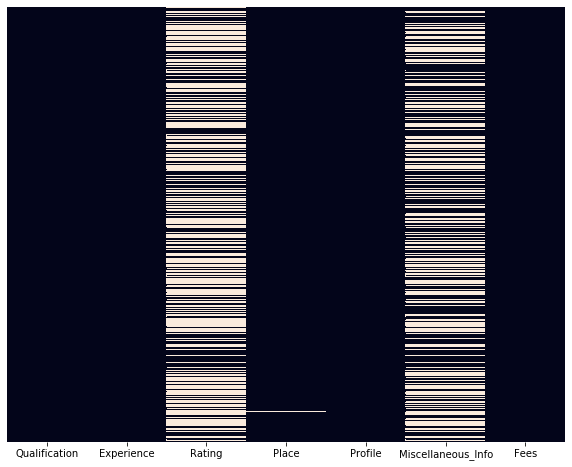

In [10]:
# Visualizing the null values via heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
#Imputing the missing value with their mode.
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))
df['Miscellaneous_Info']=imp.fit_transform(df['Miscellaneous_Info'].values.reshape(-1,1))

In [12]:
df['Rating'].fillna('0%',inplace = True)

In [13]:
#Now checking the null values again.
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

Observation: The null values have been removed.

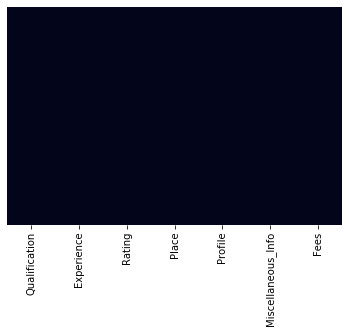

In [14]:
#With heatmap again checking the missing value.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [15]:
# Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('*************************************************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                                                                                                                   488
BHMS                                                                                                                                                                                                  477
BAMS                                                                                                                                                                                                  471
MBBS                                  

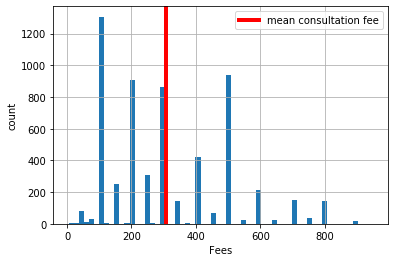

In [16]:
#Checking the mean price.

price=df['Fees'].hist(bins=60)
mean_val=np.mean(df['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean consultation fee')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [17]:
#Converting Exprience and Rating into integers.
df['Experience'] =df['Experience'].str.slice(stop=2).astype(int)
df['Rating']=df['Rating'].str.slice(stop=-1).astype(int)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# Summary Statistics

In [18]:
df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640
std,11.142798,47.340934,190.920373
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,14.000000,0.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


Observation:
1. Minimum doctor's consulation fee is 5 and maximum is 950.
2. Mean is slightly greater than median, so data is slightly right-skewed data.
3. Further, minimum Experience is 0 years and maximum is 66 years.
4. Lastly, minimum Rating is 7% and maximum Rating is 100%.

In [19]:
#Lets check Fees column where consultation charge is less than 50.
df[df.Fees < 50]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
1316,BAMS,4,0,"Worli, Mumbai",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,10
1930,BDS,6,0,"TV Medical College, Thiruvananthapuram",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,5
2248,"BHMS, Certificate in Child Health (CCH), CGO",22,0,"Kandivali West, Mumbai",Homeopath,Acrylic Partial Denture Crowns and Bridges Fix...,40
2459,BAMS,37,0,"Bandra East, Mumbai",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,40
2563,MD - Ayurveda Medicine,35,0,"Marathahalli, Bangalore",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,30
3303,BDS,3,0,"Perumbavoor, Ernakulam",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,10
3499,BAMS,45,0,"Bhandup West, Mumbai",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,30
4290,BAMS,15,0,"Secunderabad, Hyderabad",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,30
4748,"MBBS, MD - General Medicine",44,0,"Secunderabad, Hyderabad",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,20
5703,BAMS,9,0,"Goregaon East, Mumbai",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,30


Observation:
1. There are 10 doctors who charge Fees of less than 50.
2. Some doctors who have experience of more than 30 years also charge Fees which are less than 50. This might be due to their humanitarian mindset.

# Data Visualization

# Univariate Analysis

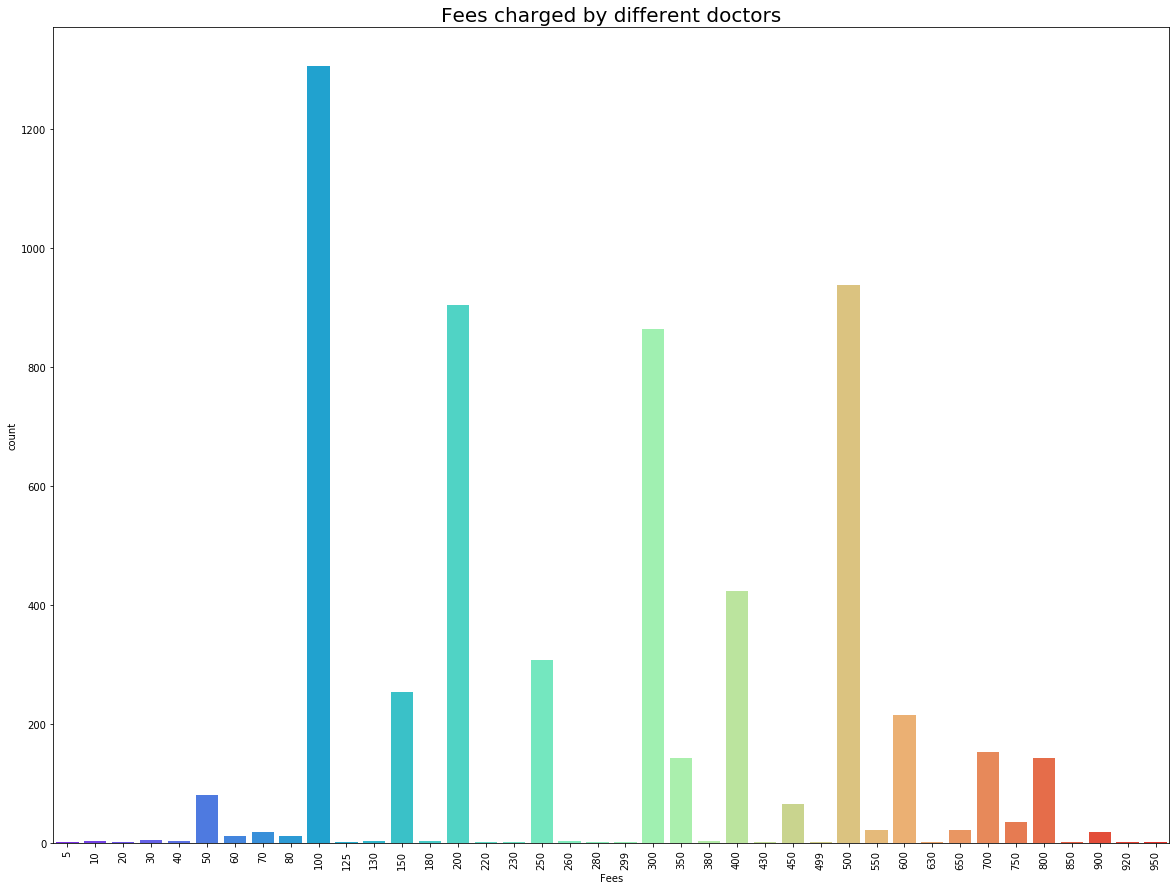

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [20]:
# Checking the Fees column.
plt.figure(figsize=(20,15))
sns.countplot(x='Fees',data=df,palette='rainbow')
plt.title('Fees charged by different doctors',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df['Fees'].value_counts())

Observation:
1. Maximum no. of doctors charge a Fees of 100.
2. Then comes doctors who charge Fees of 200, 300, and 500.

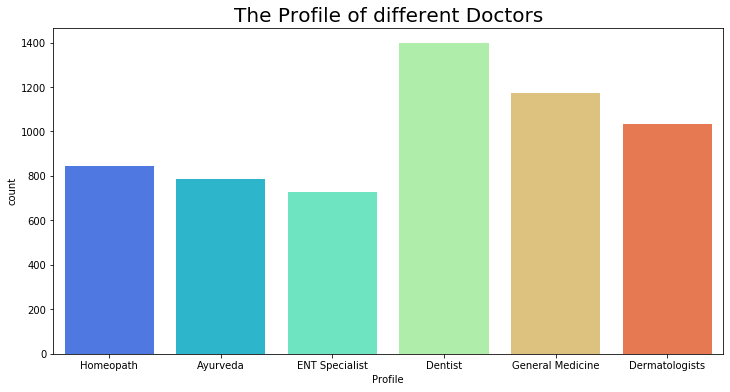

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [21]:
# Checking the profile of different doctors
plt.figure(figsize=(12,6))
sns.countplot(x='Profile',data=df,palette='rainbow')
plt.title('The Profile of different Doctors',fontsize=20)
plt.xticks(rotation=0)
plt.show()

print(df['Profile'].value_counts())

Observation: Maximum number of doctor Profile are of Dentist, followed by General Medicine and Dermatologists

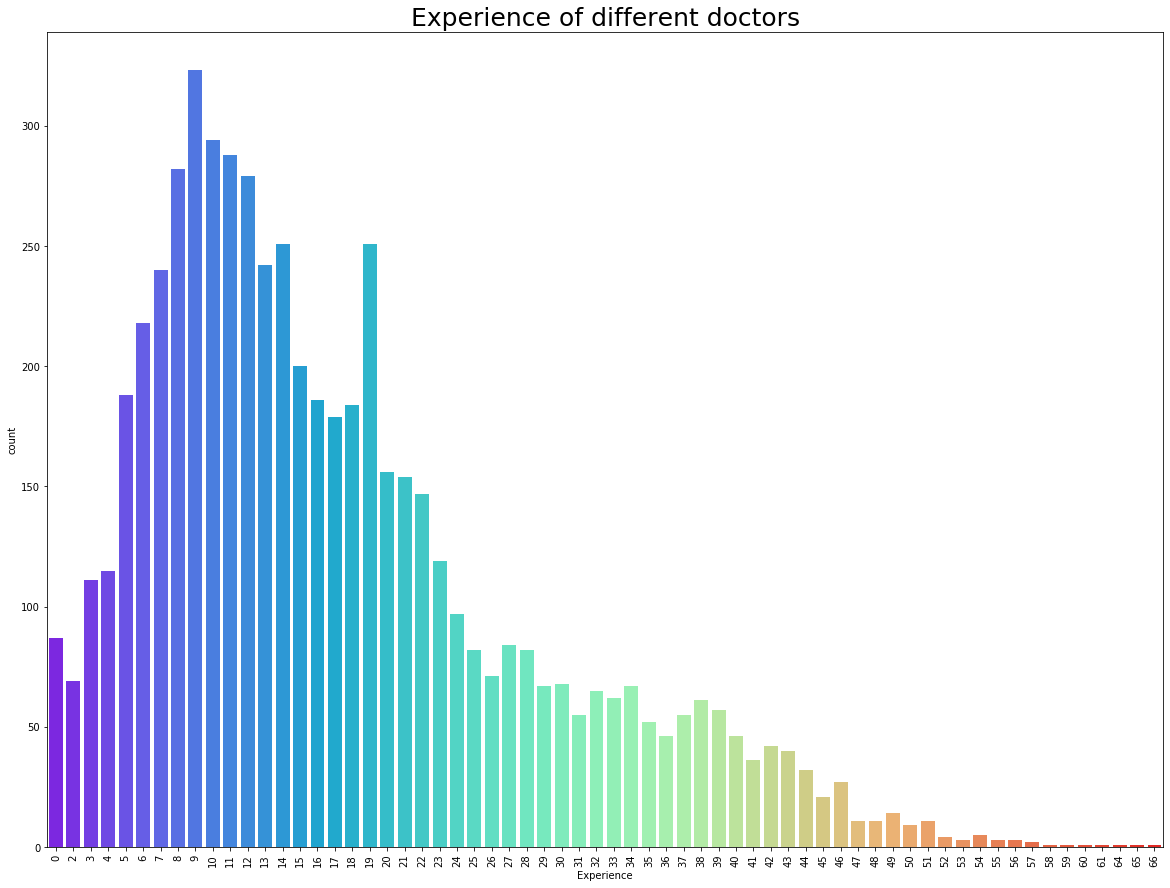

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [22]:
# Checking the Experience column.
plt.figure(figsize=(20,15))
sns.countplot(x='Experience',data=df,palette='rainbow')
plt.title('Experience of different doctors',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

print(df['Experience'].value_counts())

Observation:
1. Maximum doctors have experience ranging between 7 to 14 years.
2. Few doctors have experience of more than 50 years.

Observation:
1. Looking at above graph, it seems maximum patients are dissatisfied with doctor's service as they give rating of 0%.
2. Few doctors have rating of above 90%.

# Bivariate Analysis

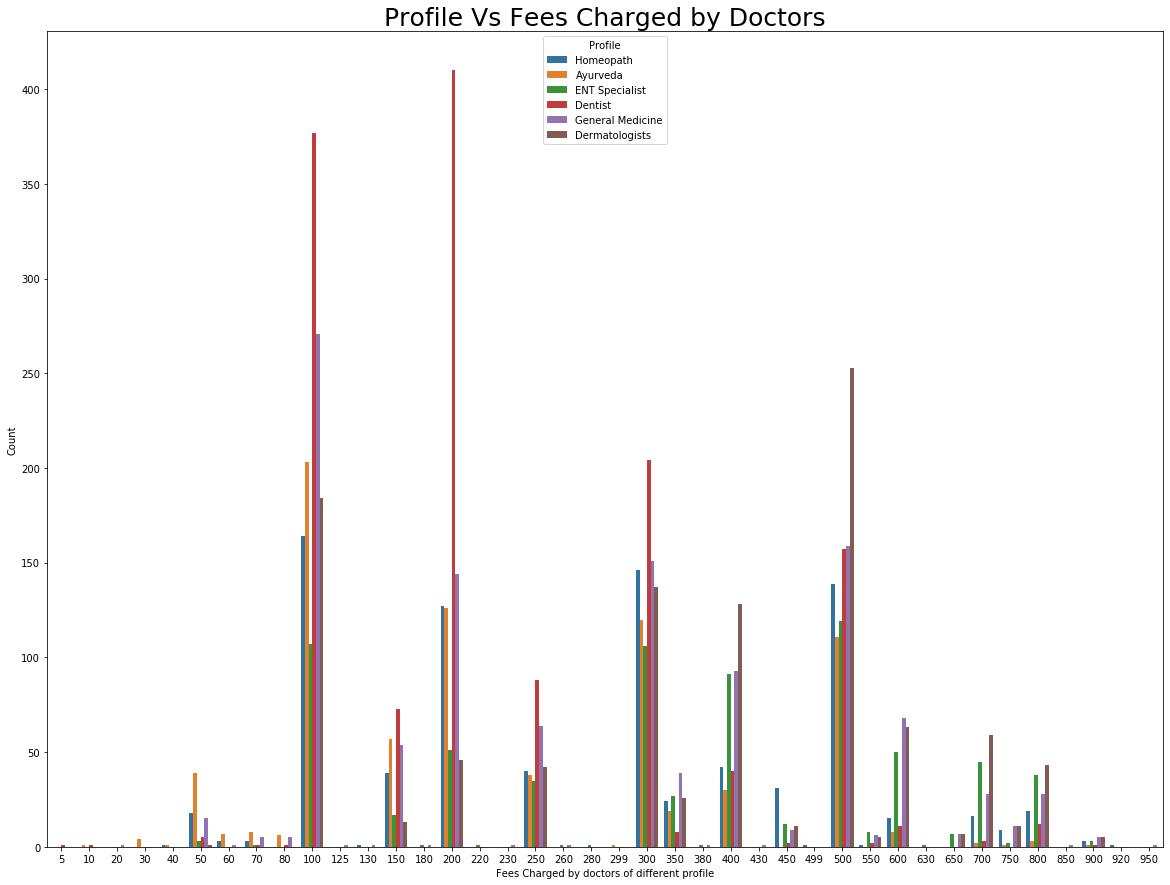

Fees  Profile         
5     Dentist             1
10    Ayurveda            1
      Dentist             1
20    General Medicine    1
30    Ayurveda            4
                         ..
900   Homeopath           3
      Ayurveda            1
      Dentist             1
920   Homeopath           1
950   General Medicine    1
Name: Profile, Length: 133, dtype: int64


In [24]:
# Gender vs Loan status
plt.figure(figsize=(20,15))
sns.countplot(x='Fees',hue='Profile',data=df)
plt.title('Profile Vs Fees Charged by Doctors',fontsize=25)
plt.xlabel('Fees Charged by doctors of different profile')
plt.ylabel('Count')
plt.show()

print(df.groupby('Fees')['Profile'].value_counts())

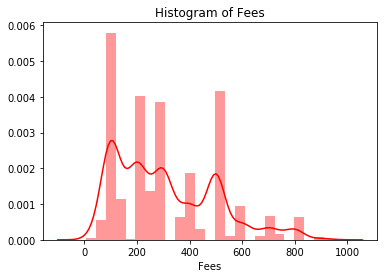

In [25]:
# Histogram of Fees column.
sns.distplot(df['Fees'],color='r')
plt.title('Histogram of Fees')
plt.show()

Observation: Histogram of Fees is not normally distributed.

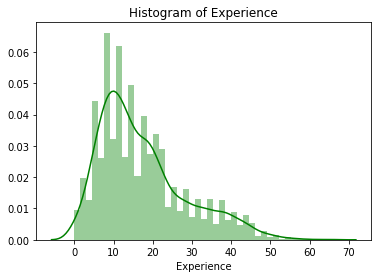

In [26]:
# Histogram of Experience
sns.distplot(df['Experience'],color='g')
plt.title('Histogram of Experience')
plt.show()

Observation: Histogram of Experience is slightly right-skewed denoting mean is greater than median in Experience column.

# Converting categorical data into numeric variables.

In [27]:
# Transforming non-numeric columns into numeric ones.

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [28]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,23,51,299,5,130,9
1,73,11,49,866,0,1422,22
2,1135,8,0,457,3,1595,21
3,464,11,0,68,0,1695,17
4,10,19,51,337,0,253,17


In [29]:
# Dropping rating column as it may impact our score in model building thus may impact predictions.
df=df.drop(columns=['Rating'],axis=1)
df

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees
0,401,23,299,5,130,9
1,73,11,866,0,1422,22
2,1135,8,457,3,1595,21
3,464,11,68,0,1695,17
4,10,19,337,0,253,17
...,...,...,...,...,...,...
5956,1075,18,70,3,1385,21
5957,596,32,541,4,1595,9
5958,596,40,216,4,1173,30
5959,943,14,850,4,2202,9


# Checking skewness

In [30]:
df.skew()

Qualification         0.239720
Experience            0.998674
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.185038
dtype: float64

In [31]:
# Treating skewness via square root and cube root method.
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [32]:
# Checking skewness again
df.skew()

Qualification         0.239720
Experience            0.093907
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.185038
dtype: float64

# Plotting Outliers

In [33]:
collist=df.columns.values
ncol=10
nrows=8

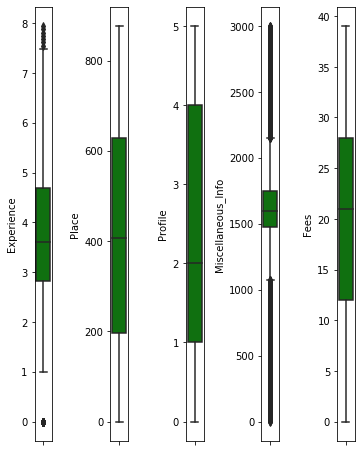

In [34]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation: There are some outliers present in the dataset.

In [35]:
#Removing Outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(5961, 6)
(5961, 6)


Observation: There were outliers present in 127 rows. These are have been removed now.

# Loading Test Data

In [36]:
df_test=pd.read_excel("E:\Datasets\doctor_consultation_fee\Final_Test.xlsx")
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [37]:
# Checking for null values
df_test.isnull().values.any()

True

In [38]:
# Checking null values column wise
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [39]:
#Imputing the missing value with their mode.
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df_test['Place']=imp.fit_transform(df_test['Place'].values.reshape(-1,1))
df_test['Miscellaneous_Info']=imp.fit_transform(df_test['Miscellaneous_Info'].values.reshape(-1,1))

In [40]:
df_test['Rating'].fillna('0%',inplace = True)

In [41]:
#Now checking the null values again.
df_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [42]:
#Converting Exprience and Rating into integers.
df_test['Experience'] =df_test['Experience'].str.slice(stop=2).astype(int)
df_test['Rating']=df_test['Rating'].str.slice(stop=-1).astype(int)
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0,"Basavanagudi, Bangalore",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,"Choolai, Chennai",Dermatologists,Acrylic Partial Denture Crowns and Bridges Fix...
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,"Porur, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1985,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# Converting categorical data into numeric variables.

In [43]:
# Transforming non-numeric columns into numeric ones.

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df_test.columns:
    if df_test[column].dtype==np.number:
        continue
    df_test[column]=le.fit_transform(df_test[column])

In [44]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,34,0,142,4,598
1,340,30,0,580,3,598
2,258,39,9,212,2,153
3,6,0,0,374,0,598
4,79,15,36,231,1,816


In [45]:
# Dropping rating column as it may impact our score in model building thus may impact predictions.
df_test=df_test.drop(columns=['Rating'],axis=1)
df

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees
0,401,4.795832,299,5,130,9
1,73,3.316625,866,0,1422,22
2,1135,2.828427,457,3,1595,21
3,464,3.316625,68,0,1695,17
4,10,4.358899,337,0,253,17
...,...,...,...,...,...,...
5956,1075,4.242641,70,3,1385,21
5957,596,5.656854,541,4,1595,9
5958,596,6.324555,216,4,1173,30
5959,943,3.741657,850,4,2202,9


In [46]:
df_test.skew()

Qualification         0.280822
Experience            0.951028
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

In [47]:
# Treating skewness via square root and cube root method.
df_test.skew()
for col in df_test.skew().index:
    if col in df_test.describe().columns:
        if df_test[col].skew()>0.55:
            df_test[col]=np.sqrt(df_test[col])
        if df_test[col].skew()<-0.55:
            df_test[col]=np.cbrt(df_test[col])

In [48]:
df_test.skew()

Qualification         0.280822
Experience            0.060526
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

In [49]:
#Removing Outliers
from scipy.stats import zscore
z_score=abs(zscore(df_test))
print(df_test.shape)
df_test_new=df_test.loc[(z_score<3).all(axis=1)]
print(df_test_new.shape)

(1987, 5)
(1987, 5)


# Model Building

In [50]:
#Splitting the data into input and output variable.
x=df_new.drop(columns=['Fees'],axis=1)
x.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info
0,401,4.795832,299,5,130
1,73,3.316625,866,0,1422
2,1135,2.828427,457,3,1595
3,464,3.316625,68,0,1695
4,10,4.358899,337,0,253


In [51]:
y=df_new['Fees']
y.head()

0     9
1    22
2    21
3    17
4    17
Name: Fees, dtype: int64

In [52]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(5961, 5) 		 (5961,)


In [53]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [54]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=183)

In [55]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(4470, 5) 		 (1491, 5)


In [56]:
# Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(4470,) 		 (1491,)


In [57]:
# Importing Models Library
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [58]:
# Using algorithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.06740445427295572
Error:
Mean absolute error: 6.8017168318004995
Mean squared error: 62.36761856414256
Root Mean Squared Error: 7.897317175100831
r2_score: 0.09057207315745675
**************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9985623324554823
Error:
Mean absolute error: 7.844735077129443
Mean squared error: 108.19668008048289
Root Mean Squared Error: 10.40176331592307
r2_score: -0.5776950398649909
*************************************

In [59]:
# Cross validating the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m,'is:')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Score: [0.08090038 0.06360712 0.06414865 0.08141959]
Mean Score: 0.0725189358651544
Standard deviation: 0.008645117954828203
*************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
Score: [-0.58667024 -0.51411249 -0.46009442 -0.36494219]
Mean Score: -0.48145483497811203
Standard deviation: 0.08088304449675614
*************************************************************************************************


Score of KNeighborsRegressor(algorithm

In [60]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 700}


In [61]:
# Using RandomForestRegressor wiith its best parameters

rf=RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=6)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score",r2_score(y_test,y_pred))
print('\n')

Score: 0.27210846781867215


Mean Absolute Error: 6.127360772539672
Mean Squared Error 54.43462890628783
Root Mean Squared Error: 7.3779827125229716


r2_score 0.20624880580015614




In [62]:
#Saving the model

#Importing joblib
from sklearn.externals import joblib

#saving the model as a pickle in a file
joblib.dump(rf,'doctor_consultation_fee_rf.obj')

['doctor_consultation_fee_rf.obj']

In [63]:
# Loading the model
rf_from_joblib=joblib.load('doctor_consultation_fee_rf.obj')

In [64]:
# using the loaded model to make predictions

prediction=rf_from_joblib.predict(df_test)
prediction

array([21.20211645, 21.20211645, 21.20211645, ..., 21.20211645,
       20.78925651, 21.20211645])

In [65]:
res = pd.DataFrame(prediction)

res.columns = ["prediction"]
res.to_csv("doctor_consultation_fee_rf.csv")